# Data Analysis 

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# Read the Dataset
cab_df = pd.read_csv("97points_wine_data.csv", encoding='ISO-8859-1')

### Understand The Data 
To get a sense of the distribution of the data, we will get the statistical lineage, the info, the head and tail, and inspect their attributes.  

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ï»¿country  187 non-null    object
 1   points      187 non-null    int64 
 2   price       187 non-null    int64 
 3   province    187 non-null    object
 4   variety     187 non-null    object
 5   winery      187 non-null    object
dtypes: int64(2), object(4)
memory usage: 5.9+ KB


In [4]:
cab_df.head()

,ï»¿country,points,price,province,variety,winery
0,US,97,85,Washington,Cabernet Sauvignon,Abeja
1,US,97,130,California,Cabernet Sauvignon,Alpha Omega
2,Italy,97,125,Tuscany,Sangiovese,Altesino
3,Italy,97,115,Tuscany,Red Blend,Antinori
4,US,97,90,California,Pinot Noir,Arista


In [5]:
cab_df.tail()

,ï»¿country,points,price,province,variety,winery
182,US,97,82,California,Pinot Noir,Williams Selyem
183,US,97,85,California,Pinot Noir,Williams Selyem
184,US,97,95,California,Pinot Noir,Williams Selyem
185,US,97,125,California,Pinot Noir,Williams Selyem
186,US,97,625,California,Cabernet Sauvignon,Yao Ming


In [6]:
cab_df.describe()

,points,price
count,187.0,187.000000
mean,97.0,184.700535
std,0.0,153.232714
min,97.0,42.000000
25%,97.0,85.000000
50%,97.0,130.000000
75%,97.0,227.000000
max,97.0,1100.000000


### Accessing The Data

Instead of accessing the bulk of the data, we may need to access each winery individually based on variety, price, province, and/or country.



In [34]:
#Accessing each Winery

wine_province = cab_df['province'].tolist()
price = cab_df['price'].tolist()
wine_variety = cab_df['variety'].tolist()
winery = cab_df['winery'].tolist()
#vintage = cab_df['Vintage'].tolist()

cabs = list(zip(price, wine_province, wine_variety, winery))
cabs[70]


(245, 'Pfalz', 'Riesling', 'Geh. Rat Dr. von Bassermann-Jordan')

In [38]:
# Accessing Each Province.
label_words = cab_df['province'].str.split(' ').tolist()
label_words[80]

['Burgundy']

In [9]:
### Visualization Distributions
As seen in the results of the describe method, the price has a wide distribution, and we can explore this visually with the histogram plots.  

SyntaxError: invalid syntax (<ipython-input-9-1fd7e5cae87b>, line 2)

Text(0.5, 1.0, 'Histogram of Wine Prices')

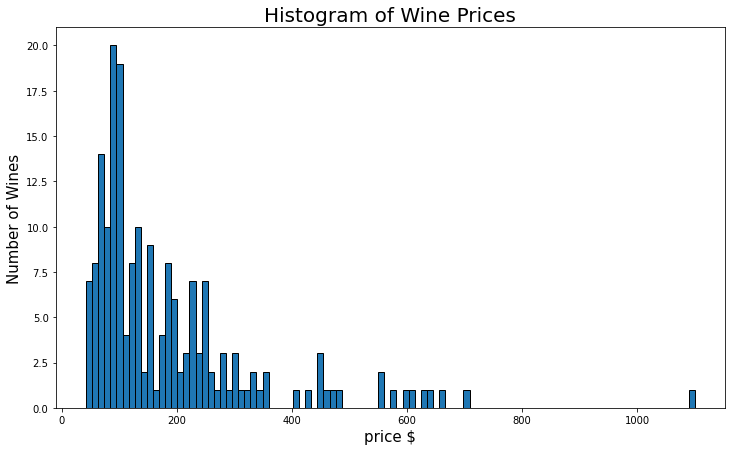

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
cab_df['price'].plot.hist(bins=100)
plt.xlabel('price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Wine Prices', fontsize=20)

Text(0, 0.5, '% of Wines')

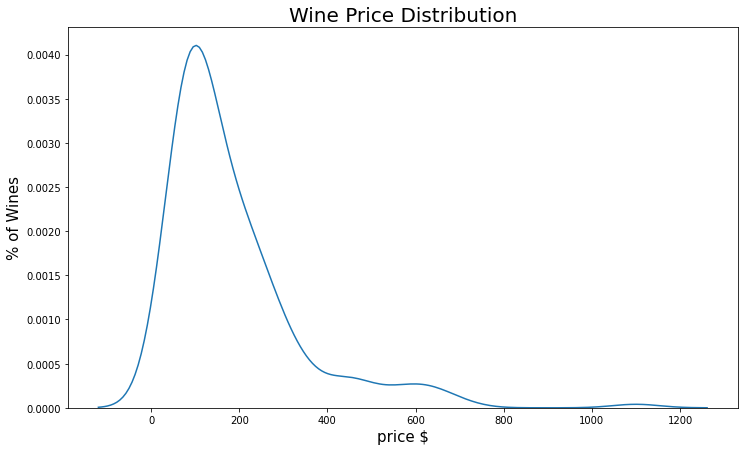

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(cab_df.price)
plt.title('Wine Price Distribution', fontsize=20)
plt.xlabel('price $', fontsize=15)
plt.ylabel('% of Wines', fontsize=15)

### Making the cut
Based on the plots above, it seems like a good idea to restrict the dataset only to wines with price < $1000. 

In [7]:
cab_df = cab_df[cab_df['price']<1000]
cab_df.head()

,ï»¿country,points,price,province,variety,winery
0,US,97,85,Washington,Cabernet Sauvignon,Abeja
1,US,97,130,California,Cabernet Sauvignon,Alpha Omega
2,Italy,97,125,Tuscany,Sangiovese,Altesino
3,Italy,97,115,Tuscany,Red Blend,Antinori
4,US,97,90,California,Pinot Noir,Arista


In [13]:
cab_df.describe()

,points,price
count,186.0,186.00000
mean,97.0,179.77957
std,0.0,138.03744
min,97.0,42.00000
25%,97.0,85.00000
50%,97.0,130.00000
75%,97.0,226.50000
max,97.0,698.00000


Text(0.5, 1.0, 'Histogram of Wine Prices')

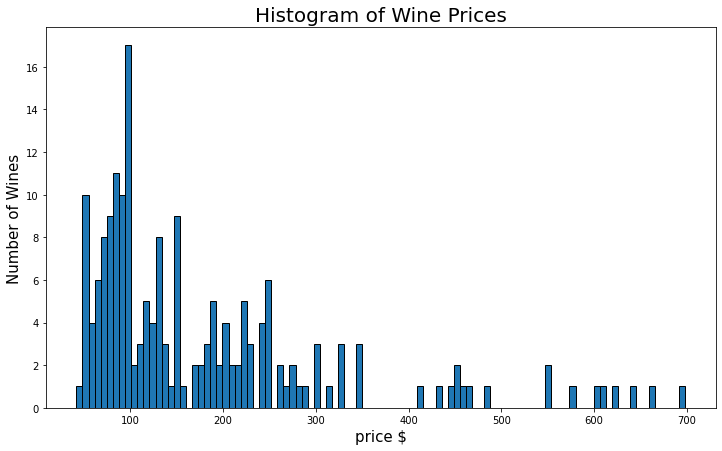

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
cab_df['price'].plot.hist(bins=100)
plt.xlabel('price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Wine Prices', fontsize=20)

In [15]:
### Wine vs. Province
Since we have modified the dataset, let's now explore further the wines by province. 

SyntaxError: invalid syntax (<ipython-input-15-fcaf9229a160>, line 2)

In [16]:
province_1 = pd.DataFrame(cab_df.groupby(['province'])['price'].mean())
province_1.columns = ['AvgPrice']

province_2 = pd.DataFrame(cab_df['province'].value_counts())
province_2.columns=['Wine Count']

province_df = pd.concat([province_1, province_2], axis=1)
province_df

,AvgPrice,Wine Count
Alsace,269.000000,1
Bordeaux,274.857143,14
Burgenland,108.666667,3
Burgundy,369.357143,14
California,122.027778,72
Champagne,250.857143,7
Douro,100.000000,1
Levante,88.000000,1
Mendoza Province,120.000000,1
Mosel-Saar-Ruwer,250.000000,2


Text(0.5, 1.0, 'Average Price by Province')

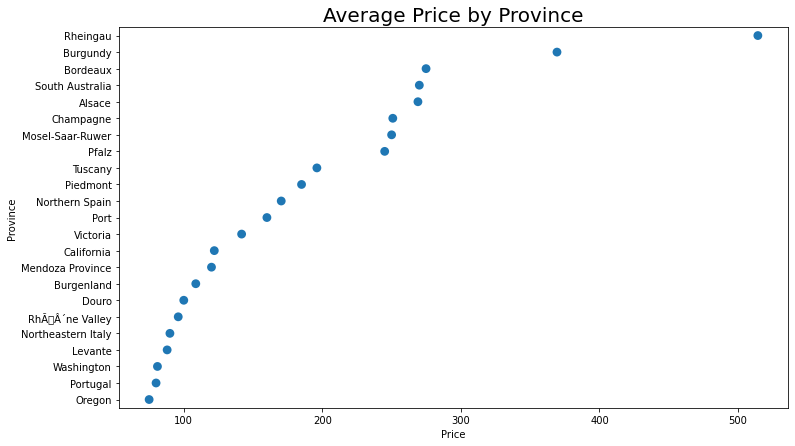

In [17]:
province_df = province_df.reset_index().sort_values('AvgPrice', ascending=False)
province_df.columns=['Province', 'Price', 'WineCount']

fig, ax = plt.subplots(figsize=(12,7))
sns.pointplot(x='Price', y='Province', data=province_df, join=False, ci=None)
plt.title('Average Price by Province', fontsize=20)

### Ratings
Do ratings correspond with higher prices in our dataset? Let's take a closer look.

In [20]:
ratings = pd.DataFrame(cab_df.groupby(['points'])['price'].mean())
ratings.columns = ['AvgPrice']

ratings_2 = pd.DataFrame(cab_df['points'].value_counts())
ratings_2.columns=['Wine Count']

ratings_df = pd.concat([ratings, ratings_2], axis=1)
ratings_df

,AvgPrice,Wine Count
97,179.77957,186


In [21]:
The unique point value appears to skew the data. Had we have different point values, we would have had a better understaing of the average price. Oh, well! Blaming it on Nick and Li. Maybe Arica. Not so much Arica but, why not? We need to make the exec decision to change the values for the points' column. This will change the scatter plot.

SyntaxError: invalid syntax (<ipython-input-21-c8023badd525>, line 1)

In [22]:
cab_df = cab_df[cab_df['points']!=0]

Text(0.5, 1.0, 'Scatter Plot: Points vs. Price')

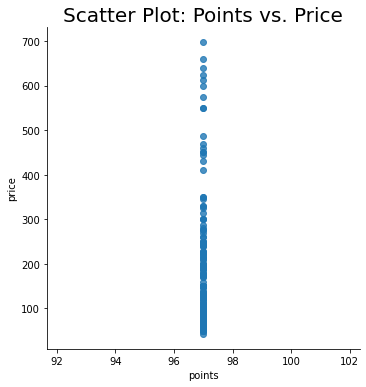

In [23]:
sns.lmplot('points', 'price', data=cab_df, fit_reg=False)
plt.title('Scatter Plot: Points vs. Price', fontsize=20)

<AxesSubplot:title={'center':'Boxplot of Price Distribution by Points'}, xlabel='points', ylabel='price'>

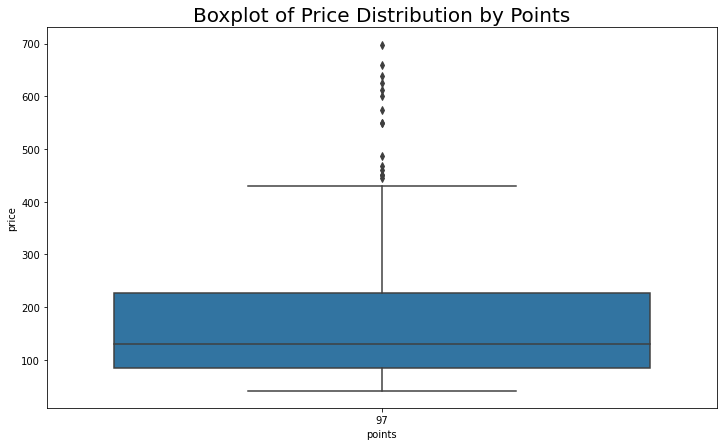

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Boxplot of Price Distribution by Points', fontsize=20)
sns.boxplot(x=cab_df['points'], y=cab_df['price'])

In [25]:
### Winery
How do prices varie between wineries.

SyntaxError: invalid syntax (<ipython-input-25-49fab5439e93>, line 2)

In [26]:
winery_1 = pd.DataFrame(cab_df.groupby(['winery'])['price'].mean())
winery_1.columns = ['AvgPrice']

winery_2 = pd.DataFrame(cab_df['winery'].value_counts())
winery_2.columns=['Wine Count']

winery_df = pd.concat([winery_1, winery_2], axis=1)
winery_df

,AvgPrice,Wine Count
Bodegas Gutierrez de la Vega,88.000000,1
Abeja,85.000000,1
Alpha Omega,130.000000,1
Altesino,125.000000,1
Antinori,115.000000,1
...,...,...
Von Othegraven,250.000000,1
Von Strasser,100.000000,1
William FÃÂ¨vre,95.000000,1
Williams Selyem,80.111111,9


Text(0.5, 1.0, 'Scatter plot of Winery vs. Price')

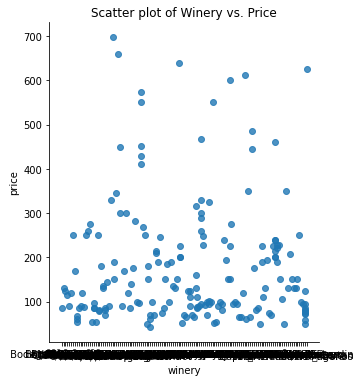

In [27]:
sns.lmplot('winery', 'price', data=cab_df, fit_reg=False)
plt.title('Scatter plot of Winery vs. Price')

Text(0.5, 1.0, 'Average Price by Winery')

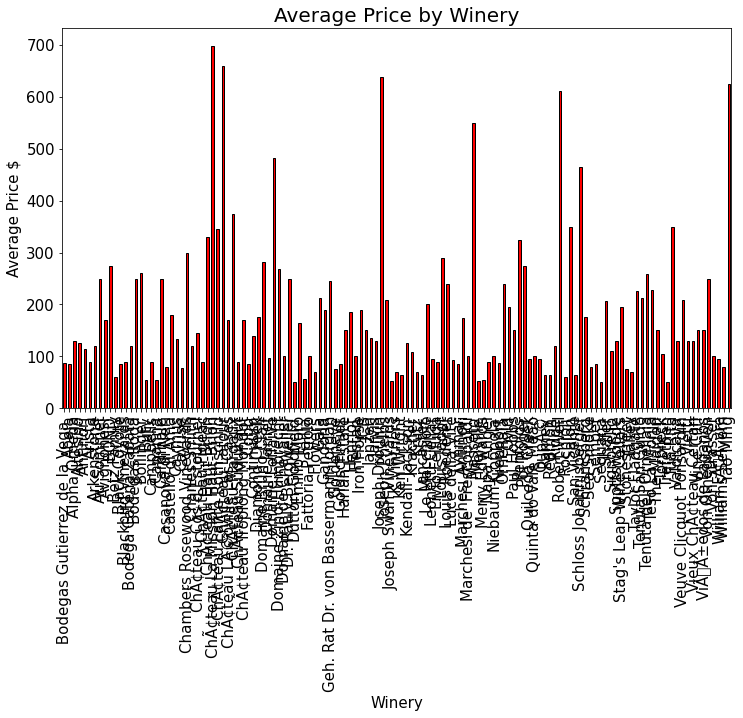

In [28]:
fig, ax = plt.subplots(figsize=(12,7))
winery_df['AvgPrice'].plot.bar(color='r')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Winery', fontsize=15)
plt.ylabel('Average Price $', fontsize=15)
plt.title('Average Price by Winery', fontsize=20)

In [29]:
### Let's look at at the attributes
Is there a correlation between variety and price? En d'autre terms, does the variety an influence the price?

Type:        list
String form: [85, 130, 125, 115, 90, 120, 250, 170, 55, 60, 68, 85, 90, 120, 88, 250, 260, 275, 55, 85, 97, 85 <...> 5, 50, 350, 130, 208, 150, 130, 130, 150, 250, 100, 95, 50, 59, 72, 75, 78, 82, 85, 95, 125, 625]
Length:      187
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [30]:
correlation = pd.DataFrame(cab_df.groupby(['variety'])['price'].mean())
correlation.columns = ['AvgPrice']

correlation_1 = pd.DataFrame(cab_df['variety'].value_counts())
correlation_1.columns=['Wine Count']

correlation_df = pd.concat([correlation, correlation_1], axis=1)
correlation_df

,AvgPrice,Wine Count
Bordeaux-style Red Blend,214.318182,22
Bordeaux-style White Blend,296.000000,3
Cabernet Blend,110.000000,1
Cabernet Franc,130.000000,1
Cabernet Sauvignon,141.444444,36
Champagne Blend,225.857143,7
Chardonnay,233.000000,16
Malbec,120.000000,1
Merlot,313.571429,7
Monastrell,88.000000,1


In [ ]:
## Findings

To be considered:

*1. Winery doesn't seem to provide a good indication of the price discrimination.

*2. Points does seem to do a good job of indicating higher average price. * 

*3. Wines from Bordeaux seem to have higher average prices vs. other parts of the world. However, most of the inventory is from California.* 

*4. The data appears to have a normal Distribution. *

